In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from matplotlib.ticker import MaxNLocator

In [3]:
df_train = pd.read_excel('sawdust_train.xlsx')
df_train

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35
5,10,08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,...,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067,0.00,66.65,33.35
6,11,13a,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,...,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057,16.66,16.66,66.67
7,12,13b,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,...,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234,16.66,16.66,66.67
8,17,11a,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,...,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966,66.67,16.66,16.66
9,18,11b,1.80260,1.80223,1.80160,1.80067,1.79940,1.79788,1.79646,1.79531,...,0.544048,0.549074,0.553642,0.558111,0.562464,0.566793,0.570855,66.67,16.66,16.66


Q3.2.A

In [4]:
#modify dataframe
df_train.set_index('OBSNAM', inplace=True)
sawdust = df_train.iloc[:,1:1202]
sawdust

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
OBSNAM,,,,,,,,,,,,,,,,,,,,,
02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,...,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,...,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,...,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,...,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,...,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635
08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,...,0.547361,0.552224,0.557200,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067
13a,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,1.77113,1.77084,...,0.537287,0.543007,0.548699,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057
13b,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,1.77433,1.77397,...,0.539009,0.543364,0.547846,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234
11a,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,1.80026,1.79969,...,0.528280,0.533482,0.538662,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966


In [5]:
#sawdust.transpose().hist()

<AxesSubplot:title={'center':'Raw fluorescence data of 106 data points (lines)'}, xlabel='Wavelength', ylabel='Signal'>

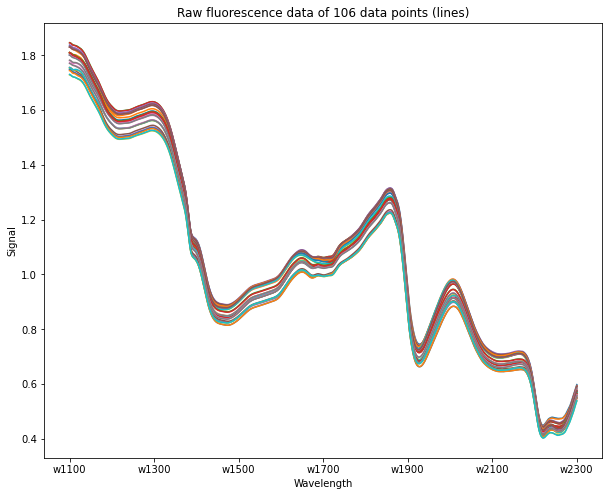

In [6]:
sawdust.transpose().plot(legend=None,
                              figsize=(10,8),
                              title='Raw fluorescence data of 106 data points (lines)',
                              xlabel='Wavelength',
                              ylabel='Signal')

Q3.2.B

In [7]:
# standardization
scaler = StandardScaler(with_std=False)
sawdust_scaled = scaler.fit_transform(sawdust)
sawdust_scaled

array([[ 0.04057267,  0.040718  ,  0.04074367, ...,  0.02684677,
         0.02725577,  0.02789977],
       [ 0.03605267,  0.036208  ,  0.03626367, ...,  0.02422277,
         0.02412677,  0.02434477],
       [ 0.05215267,  0.052248  ,  0.05246367, ...,  0.02147877,
         0.02185077,  0.02229377],
       ...,
       [-0.02362733, -0.023852  , -0.02383633, ..., -0.01323423,
        -0.01287223, -0.01283723],
       [-0.06532733, -0.065562  , -0.06553633, ..., -0.03093823,
        -0.03125823, -0.03187423],
       [-0.06357733, -0.063732  , -0.06377633, ..., -0.03092723,
        -0.03087323, -0.03124523]])

In [8]:
# fit transform pca
pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(sawdust_scaled)

In [9]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = sawdust.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
OBSNAM,,,,,
02a,-1.078295,-0.047001,0.251280,0.024857,0.003036
02b,-0.929153,-0.060230,0.245587,0.000213,-0.003432
15a,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
15b,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
08a,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
08b,-1.095564,0.004305,0.085434,-0.023682,-0.008591
13a,-0.429080,0.383454,-0.016684,0.107723,-0.004963
13b,-0.482592,0.379079,-0.008178,0.101704,-0.004043
11a,0.070632,-0.290886,-0.044821,0.048580,-0.003262


In [10]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = sawdust.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


Q3.2.C

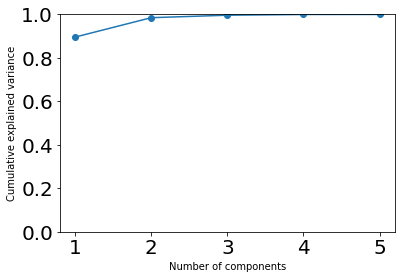

In [11]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.tick_params(labelsize=20)
plt.ylim(0,1)
plt.show()

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.89557845, 0.98472379, 0.996083  , 0.99941452, 0.99963969])

From the plot, we can see the cumulative explained variance ratio is very high. When we print out the specific values, we only need three variables to capture 99% variance.

Q3.2.D

In [13]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(15, 15))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

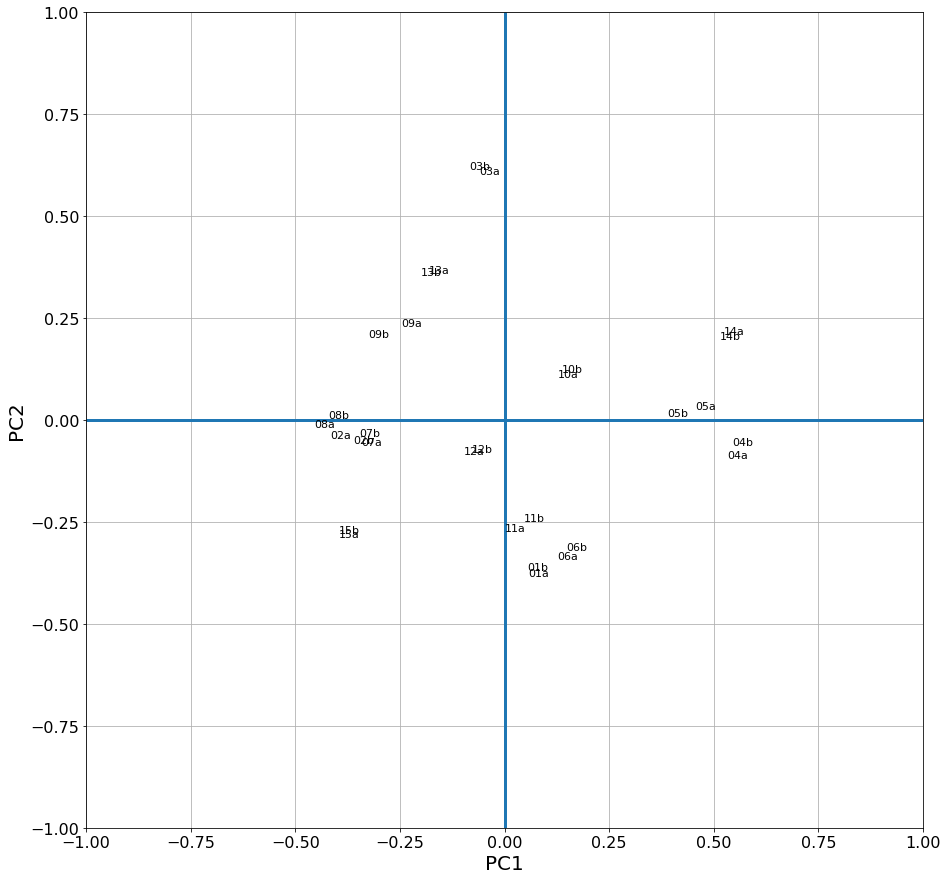

In [14]:
score_plot(pca_scores[:,:2], score_labels=scores_pd.index)
plt.show()

Here we can see potential outliers: 03a and 03b.

There seems to be a cluster at middle left: 08a,08b,02a,02b,07a,07b. And another cluster at bottom: 11a,11b,06a,06b,01a,01b.

Q3.2.E plot the loading

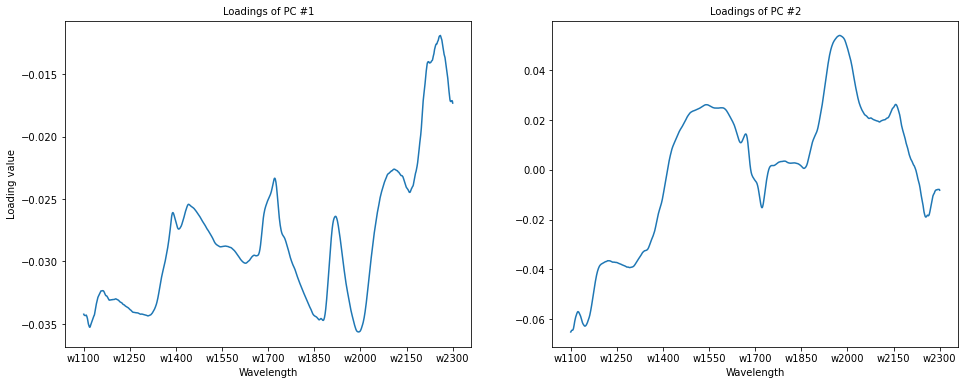

In [15]:
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_pd['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=10)
sub1.set_ylabel('Loading value', fontsize=10)
sub1.set_title('Loadings of PC #1', fontsize=10)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=10)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_pd['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=10)
sub2.set_title('Loadings of PC #2', fontsize=10)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=10)

plt.show()

The wavelength of (2100 to 2300) seems to be important to PC1, all wavelengths load negative values to PC1; the wavelength of (1400 to 2100) seems to be important to PC2.

PC1 capture predominantly information from high wavelength, while PC2 capture more information from middle wavelength.

Q3.2.F

In [16]:
df_test = pd.read_excel('sawdust_pred.xlsx')
df_test

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,3,27a,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,...,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663,10,10,80
1,4,27b,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,...,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786,10,10,80
2,7,25a,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,...,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059,80,10,10
3,8,25b,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,...,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698,80,10,10
4,13,17a,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,...,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163,25,50,25
5,14,17b,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,...,0.528003,0.532696,0.537328,0.542243,0.547303,0.552375,0.556934,25,50,25
6,15,20a,1.80338,1.80302,1.80225,1.80105,1.79942,1.79753,1.79581,1.79451,...,0.548729,0.554031,0.559213,0.564588,0.569960,0.575186,0.580128,50,10,40
7,16,20b,1.80347,1.80308,1.80243,1.80148,1.80018,1.79860,1.79707,1.79572,...,0.549973,0.555515,0.560995,0.566629,0.572065,0.577189,0.581623,50,10,40
8,23,26a,1.77958,1.77923,1.77851,1.77739,1.77585,1.77407,1.77236,1.77096,...,0.531467,0.536348,0.540972,0.545828,0.550341,0.554430,0.557804,10,80,10
9,24,26b,1.78660,1.78591,1.78499,1.78380,1.78236,1.78084,1.77951,1.77851,...,0.532655,0.536440,0.540345,0.544834,0.549624,0.554474,0.559020,10,80,10


In [17]:
#modify dataframe
df_test.set_index('OBSNAM', inplace=True)
sawdust_te = df_test.iloc[:,1:1202]
# standardization
sawdust_scaled_te = scaler.transform(sawdust_te)
sawdust_scaled_te

array([[ 0.01971267,  0.019778  ,  0.01984367, ...,  0.01302877,
         0.01317377,  0.01353777],
       [ 0.02209267,  0.022168  ,  0.02225367, ...,  0.01229777,
         0.01244677,  0.01266077],
       [-0.00670733, -0.006522  , -0.00641633, ...,  0.00782477,
         0.00816877,  0.00893377],
       ...,
       [-0.06123733, -0.061142  , -0.06089633, ..., -0.02942323,
        -0.02953123, -0.02991523],
       [-0.01602733, -0.015892  , -0.01583633, ..., -0.01567623,
        -0.01553123, -0.01573223],
       [-0.01063733, -0.010932  , -0.01100633, ..., -0.01623923,
        -0.01624623, -0.01640123]])

In [18]:
# dimensionality reduction
pca_scores_te = pca.transform(sawdust_scaled_te)

Q3.2.G

In [19]:
# get score for test dataset
scores_te = pd.DataFrame(data = pca_scores_te
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = sawdust_te.index)
scores_te

,PC1,PC2,PC3,PC4,PC5
OBSNAM,,,,,
27a,-0.755046,0.082224,-0.106194,-0.006280,-0.046023
27b,-0.741493,0.043018,-0.104981,-0.027725,-0.054997
25a,0.526514,-0.235156,0.004148,0.154854,-0.024401
25b,0.670262,-0.195146,0.011119,0.151286,-0.022596
17a,0.795253,-0.046558,0.035398,-0.030072,-0.035528
17b,0.901669,0.006261,0.039356,-0.028244,-0.028235
20a,-0.215814,-0.066147,-0.061746,0.075020,-0.013988
20b,-0.286806,-0.037825,-0.066603,0.083834,-0.004424
26a,0.614048,-0.071040,0.078673,-0.036015,-0.001160


In [20]:
# put two score into one dataframe
tr = scores_pd.iloc[:,0:2]
tr['type']=['train']*30
te = scores_te.iloc[:,0:2]
te['type']=['test']*24
newdf = pd.concat([tr, te])
newdf

/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_58768/1126559614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['type']=['train']*30
/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_58768/1126559614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['type']=['test']*24


,PC1,PC2,type
OBSNAM,,,
02a,-1.078295,-0.047001,train
02b,-0.929153,-0.060230,train
15a,-1.022756,-0.305001,train
15b,-1.019964,-0.295982,train
08a,-1.184856,-0.018965,train
08b,-1.095564,0.004305,train
13a,-0.429080,0.383454,train
13b,-0.482592,0.379079,train
11a,0.070632,-0.290886,train


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

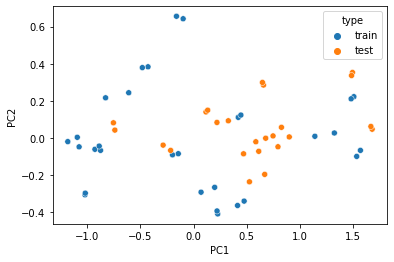

In [21]:
sns.scatterplot(data=newdf, x="PC1", y="PC2", hue="type")

Putting scores of train and test data in one graph, with different color allow us to compare their score on both components.

We are expected to see random points of train and test data in the whole plot, which means that the data is seperated properly. If there are any patterns of train and test set, then our accuracy rate during testing can be affected, leads to unrealiable result.

Q3.3.A

In [22]:
# extract response data y from train
y_train = df_train.iloc[:,1202:]
y_train

,Spruce,Pine,Birch
OBSNAM,,,
02a,0.00,100.00,0.00
02b,0.00,100.00,0.00
15a,33.33,33.33,33.33
15b,33.33,33.33,33.33
08a,0.00,66.65,33.35
08b,0.00,66.65,33.35
13a,16.66,16.66,66.67
13b,16.66,16.66,66.67
11a,66.67,16.66,16.66


In [23]:
pls_sklearn = PLSRegression(n_components=3, scale=False)
pls_sklearn.fit(sawdust_scaled, y_train)
# score returns R^2 value
pls_sklearn.score(sawdust_scaled,y_train)

0.9240392024759805

The R^2 value here is already more than 0.92, so we continue with 3 components.

Q3.3.B

In [25]:
# actual y extract from test data set 
y_test_act = df_test.iloc[:,1202:]
y_test_act

,Spruce,Pine,Birch
OBSNAM,,,
27a,10,10,80
27b,10,10,80
25a,80,10,10
25b,80,10,10
17a,25,50,25
17b,25,50,25
20a,50,10,40
20b,50,10,40
26a,10,80,10


In [28]:
# predict y using test data set of x
y_test_predicted = pls_sklearn.predict(sawdust_scaled_te)
y_test_predicted = pd.DataFrame(data=y_test_predicted,columns=['Spruce','Pine','Birch'],index = y_test_act.index)
y_test_predicted

,Spruce,Pine,Birch
OBSNAM,,,
27a,25.911004,7.037867,67.046889
27b,28.366571,8.296853,63.332367
25a,62.077285,26.062968,11.855574
25b,60.811750,27.413641,11.770402
17a,45.670927,41.014140,13.310846
17b,43.299276,41.425902,15.270690
20a,42.676719,14.057763,43.261298
20b,40.161606,12.570159,47.264000
26a,39.580034,54.299558,6.116596


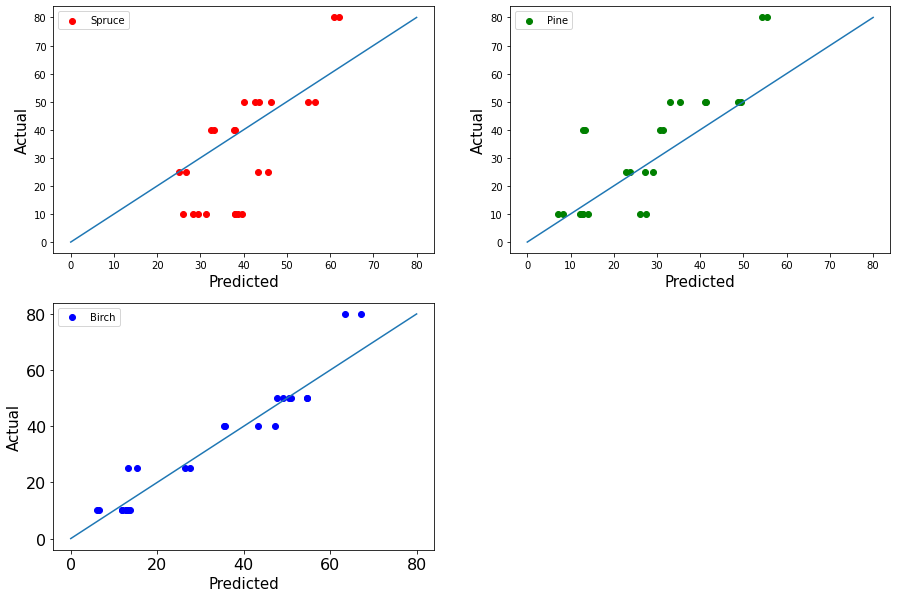

In [49]:
# create three plots for actural vs predicted for each type
fig2 = plt.figure(figsize=(15, 10))
sub5 = fig2.add_subplot(221)
plt.scatter(y_test_predicted['Spruce'], y_test_act['Spruce'], color='r',label='Spruce')
plt.plot([0, 80], [0, 80])
plt.legend()
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
sub6 = fig2.add_subplot(222)
plt.scatter(y_test_predicted['Pine'], y_test_act['Pine'], color='g',label='Pine')
plt.plot([0, 80], [0, 80])
plt.legend()
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
sub7 = fig2.add_subplot(223)
plt.scatter(y_test_predicted['Birch'], y_test_act['Birch'], color='b',label='Birch')
plt.plot([0, 80], [0, 80])
plt.legend()
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Actual', fontsize = 15)
plt.tick_params(labelsize=16)

From above, we can see that, in the third plot, the points are more closed to the line 'predicted = actual'. The model perform better on predicting type Birch, predicted y has more precise value.

For Spruce, the points are more likely to clustered below the line, so I would say that the model tends to predict higher y than actual value for type Spruce.

For Pine, the points are not closed to the line y=x, so I would say that the model does not predict accurate value for type Pine, the residual error is high.